#FASHION MNIST DATA CLASSIFICATION PROJECT

#AI_MICROSOFT B2_HARSHAVARDHAN

#STEP 1 IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#STEP 2 LOAD DATA

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Print the shape of data

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#show Image

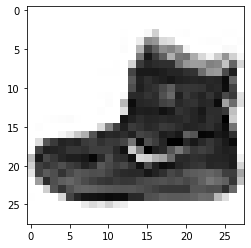

In [ ]:
plt.imshow(X_train[0],cmap="Greys")

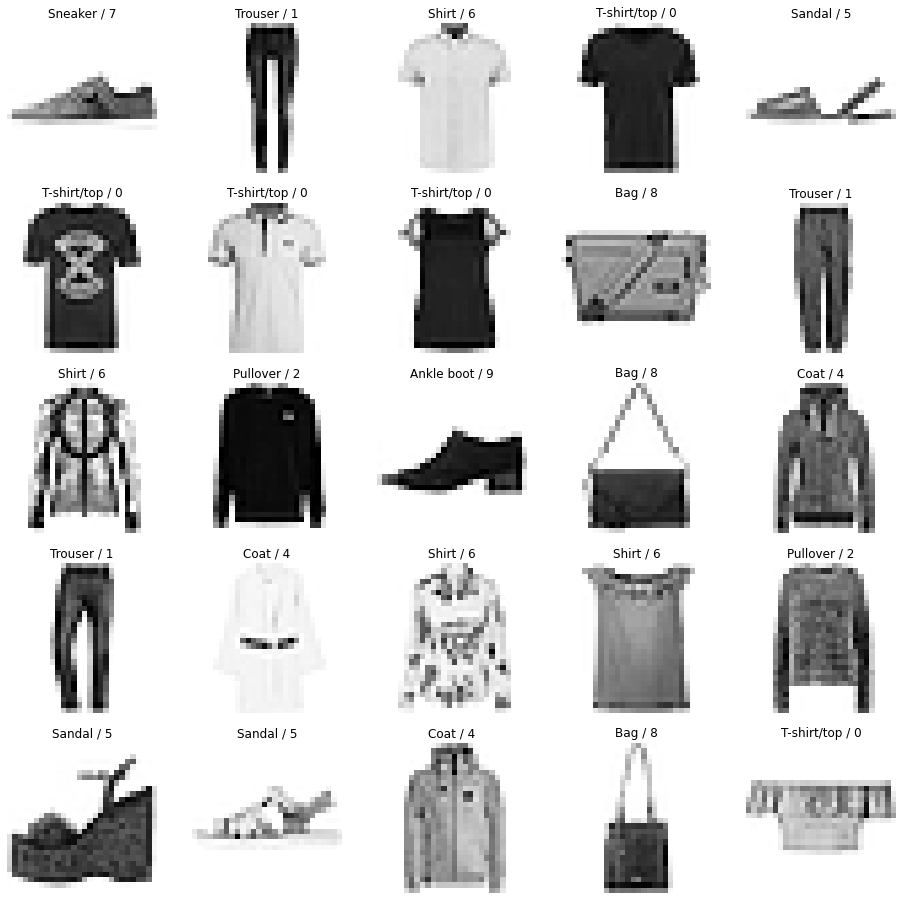

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
#feature scaling

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Step 3. Building CNN  Model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 25s 245ms/step - loss: 0.6289 - accuracy: 0.7897 - val_loss: 0.4219 - val_accuracy: 0.8541
Epoch 2/10
94/94 [==============================] - 24s 261ms/step - loss: 0.3770 - accuracy: 0.8680 - val_loss: 0.3605 - val_accuracy: 0.8756
Epoch 3/10
94/94 [==============================] - 26s 272ms/step - loss: 0.3308 - accuracy: 0.8836 - val_loss: 0.3315 - val_accuracy: 0.8833
Epoch 4/10
94/94 [==============================] - 21s 225ms/step - loss: 0.3029 - accuracy: 0.8927 - val_loss: 0.3232 - val_accuracy: 0.8848
Epoch 5/10
94/94 [==============================] - 21s 225ms/step - loss: 0.2820 - accuracy: 0.8999 - val_loss: 0.3088 - val_accuracy: 0.8924
Epoch 6/10
94/94 [==============================] - 22s 237ms/step - loss: 0.2635 - accuracy: 0.9060 - val_loss: 0.2959 - val_accuracy: 0.8957
Epoch 7/10
94/94 [==============================] - 23s 243ms/step - loss: 0.2505 - accuracy: 0.9116 - val_loss: 0.3018 - val_accuracy: 0.8937

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 4s 14ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.18, 0.05, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2780 - accuracy: 0.8994


[0.2779838740825653, 0.899399995803833]

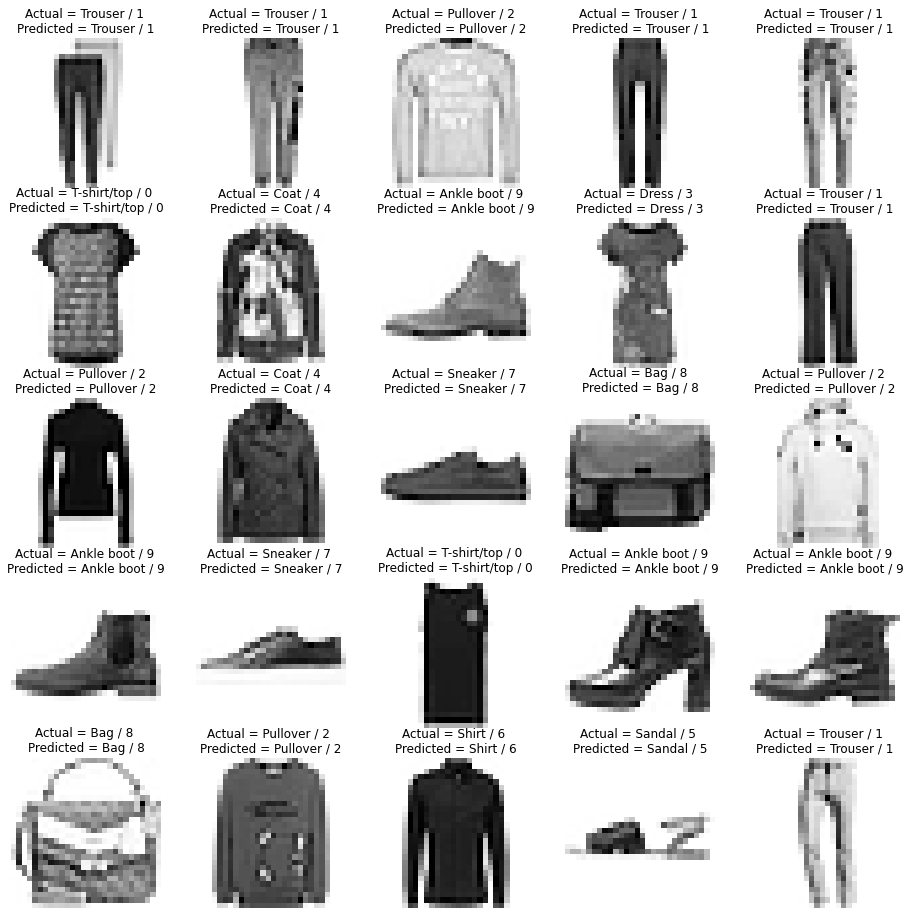

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

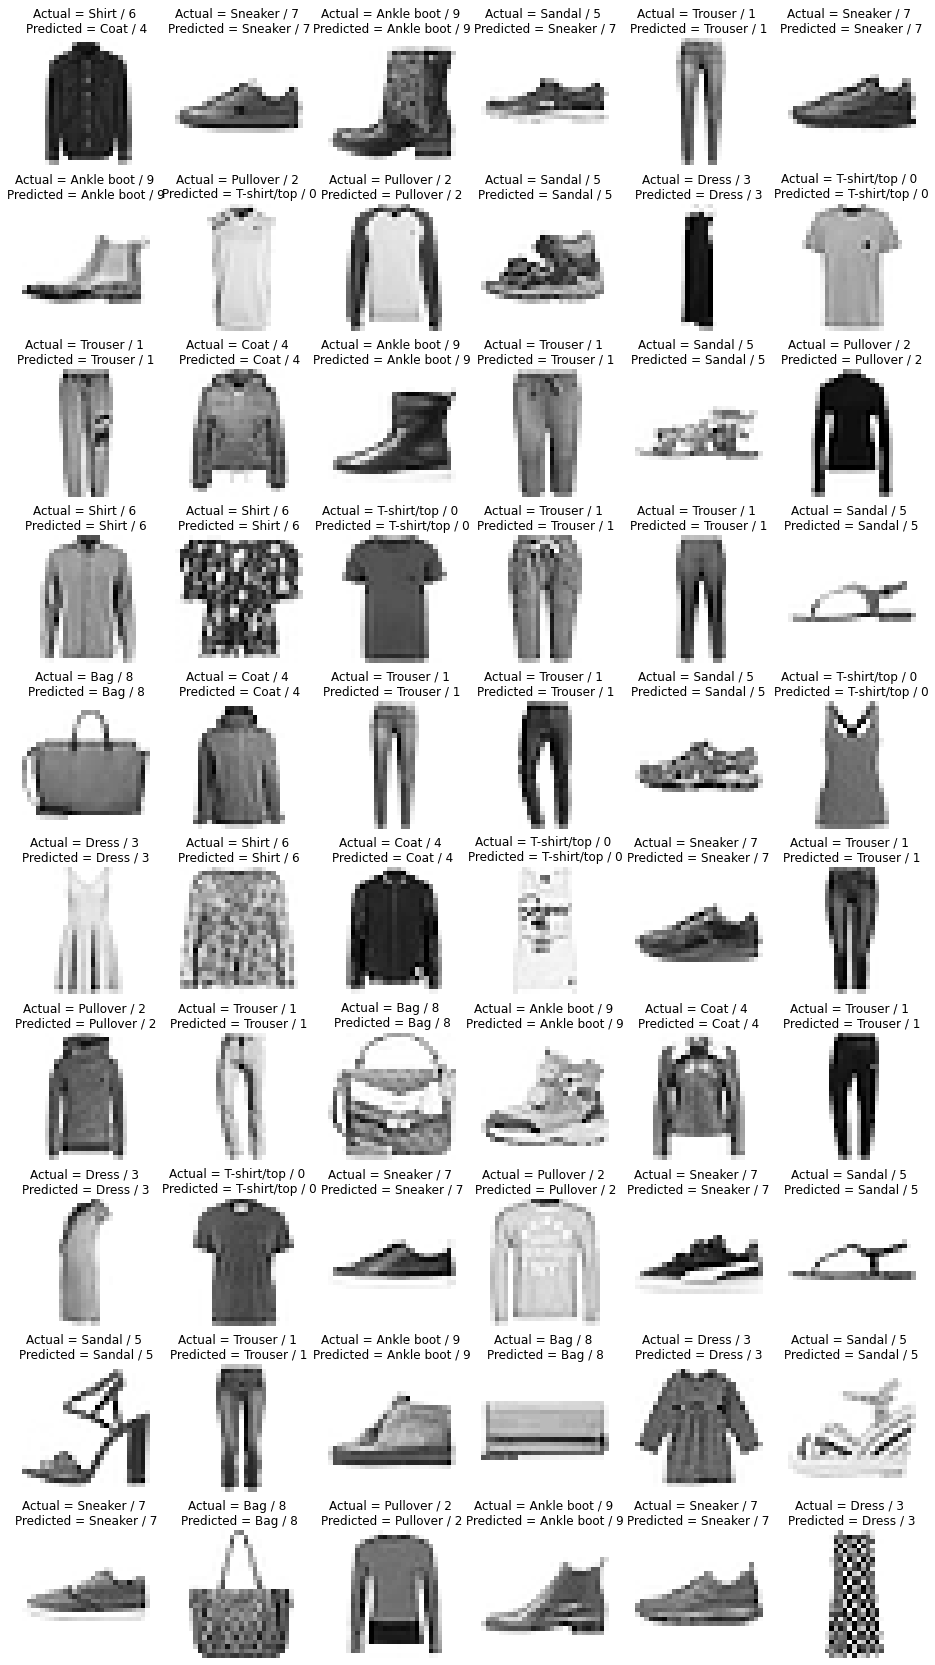

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.87      0.84      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.86      0.82      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.71      0.72      0.71      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



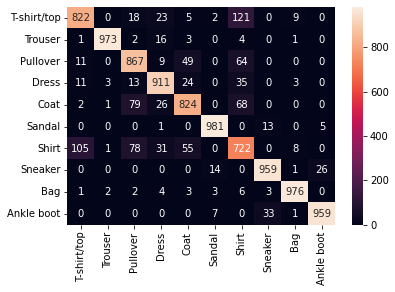

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

'# Save Model'

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

#Building complex CNN

In [ ]:
#BUILDING CNN
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))


Epoch 1/20
94/94 [==============================] - 28s 283ms/step - loss: 1.0397 - accuracy: 0.6121 - val_loss: 0.5913 - val_accuracy: 0.7763
Epoch 2/20
94/94 [==============================] - 27s 286ms/step - loss: 0.5522 - accuracy: 0.7926 - val_loss: 0.4525 - val_accuracy: 0.8331
Epoch 3/20
94/94 [==============================] - 29s 305ms/step - loss: 0.4504 - accuracy: 0.8358 - val_loss: 0.3987 - val_accuracy: 0.8519
Epoch 4/20
94/94 [==============================] - 28s 293ms/step - loss: 0.3987 - accuracy: 0.8528 - val_loss: 0.3621 - val_accuracy: 0.8648
Epoch 5/20
94/94 [==============================] - 27s 286ms/step - loss: 0.3644 - accuracy: 0.8664 - val_loss: 0.3580 - val_accuracy: 0.8649
Epoch 6/20
94/94 [==============================] - 27s 285ms/step - loss: 0.3422 - accuracy: 0.8756 - val_loss: 0.3279 - val_accuracy: 0.8769
Epoch 7/20
94/94 [==============================] - 27s 285ms/step - loss: 0.3208 - accuracy: 0.8818 - val_loss: 0.3084 - val_accuracy: 0.8860

#BUILIDNG COMPACT COMPLEX CNN MODEL

In [ ]:
#BUILDING COMPACT COMPLEX CNN
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

Epoch 1/30
94/94 [==============================] - 65s 676ms/step - loss: 1.2144 - accuracy: 0.5268 - val_loss: 0.6230 - val_accuracy: 0.7544
Epoch 2/30
94/94 [==============================] - 59s 631ms/step - loss: 0.6044 - accuracy: 0.7705 - val_loss: 0.4790 - val_accuracy: 0.8123
Epoch 3/30
94/94 [==============================] - 60s 640ms/step - loss: 0.4862 - accuracy: 0.8232 - val_loss: 0.4049 - val_accuracy: 0.8502
Epoch 4/30
94/94 [==============================] - 60s 644ms/step - loss: 0.4117 - accuracy: 0.8536 - val_loss: 0.3827 - val_accuracy: 0.8618
Epoch 5/30
94/94 [==============================] - 59s 632ms/step - loss: 0.3690 - accuracy: 0.8697 - val_loss: 0.3497 - val_accuracy: 0.8720
Epoch 6/30
94/94 [==============================] - 59s 624ms/step - loss: 0.3352 - accuracy: 0.8812 - val_loss: 0.3326 - val_accuracy: 0.8803
Epoch 7/30
94/94 [==============================] - 58s 622ms/step - loss: 0.3126 - accuracy: 0.8906 - val_loss: 0.3165 - val_accuracy: 0.8867